<a href="https://colab.research.google.com/github/PhamQuocHuy1101/acea-water-prediction/blob/master/%C4%90%E1%BB%93_%C3%A1n_cu%E1%BB%91i_k%C3%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# for Colab
import os

os.chdir('./drive/MyDrive/cacMoHinhPhanTichDuLieu')

In [ ]:
# df = pd.read_csv('./Aquifer_Petrignano.csv') # Good 8
df = pd.read_csv('./Lake_Bilancino.csv') # Good 9
# df = pd.read_csv('./River_Arno.csv') # Good 17
# df = pd.read_csv('./Water_Spring_Amiata.csv') # Good 14
df.head()

,Date,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
0,03/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
1,04/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
2,05/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
3,06/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.43,0.31
4,07/06/2002,NaN,NaN,NaN,NaN,NaN,NaN,249.44,0.31


In [ ]:
df.describe()

,Rainfall_S_Piero,Rainfall_Mangona,Rainfall_S_Agata,Rainfall_Cavallina,Rainfall_Le_Croci,Temperature_Le_Croci,Lake_Level,Flow_Rate
count,6026.000000,6026.000000,6026.000000,6026.000000,6026.000000,6025.000000,6603.000000,6582.000000
mean,2.471225,3.340657,2.670063,2.674743,3.129871,14.530141,249.564091,2.760968
std,6.650012,8.903134,7.166643,7.655847,8.025121,6.944029,2.172558,4.073428
min,0.000000,0.000000,0.000000,0.000000,0.000000,-5.350000,243.530000,0.310000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,248.000000,0.600000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,14.500000,250.200000,1.500000
75%,0.800000,1.400000,1.200000,0.600000,1.200000,20.100000,251.400000,3.000000
max,80.600000,110.000000,120.200000,113.600000,88.400000,34.000000,252.760000,74.650000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6603 entries, 0 to 6602
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  6603 non-null   object 
 1   Rainfall_S_Piero      6026 non-null   float64
 2   Rainfall_Mangona      6026 non-null   float64
 3   Rainfall_S_Agata      6026 non-null   float64
 4   Rainfall_Cavallina    6026 non-null   float64
 5   Rainfall_Le_Croci     6026 non-null   float64
 6   Temperature_Le_Croci  6025 non-null   float64
 7   Lake_Level            6603 non-null   float64
 8   Flow_Rate             6582 non-null   float64
dtypes: float64(8), object(1)
memory usage: 464.4+ KB


In [ ]:
# convert string to datetime
def to_date(df):
  df.Date = pd.to_datetime(df.Date, format='%d/%m/%Y')

to_date(df)

In [ ]:
# Check date missing
delta = df.Date - df.Date.shift(1)
delta.sum(), delta.count() # duration 1 days in all data

(Timedelta('6602 days 00:00:00'), 6602)

In [ ]:
def plot_null_value(df, columns):
  fig, axs = plt.subplots(nrows=len(columns), ncols=1, figsize=(10, 5 * len(columns)))
  if len(columns) == 1:
    axs = [axs]
  for ax, col in zip(axs, columns):
    null_value = df[col].fillna(0)
    replace = df[col].fillna(np.inf)

    sns.lineplot(x=df.Date, y=null_value, ax=ax, color='darkorange', label='miss value')
    sns.lineplot(x=df.Date, y=replace, ax=ax, color='dodgerblue', label='fill value')

    ax.set_xlim([df.Date.min(), df.Date.max()])

In [ ]:
df.columns

Index(['Date', 'Rainfall_S_Piero', 'Rainfall_Mangona', 'Rainfall_S_Agata',
       'Rainfall_Cavallina', 'Rainfall_Le_Croci', 'Temperature_Le_Croci',
       'Lake_Level', 'Flow_Rate'],
      dtype='object')

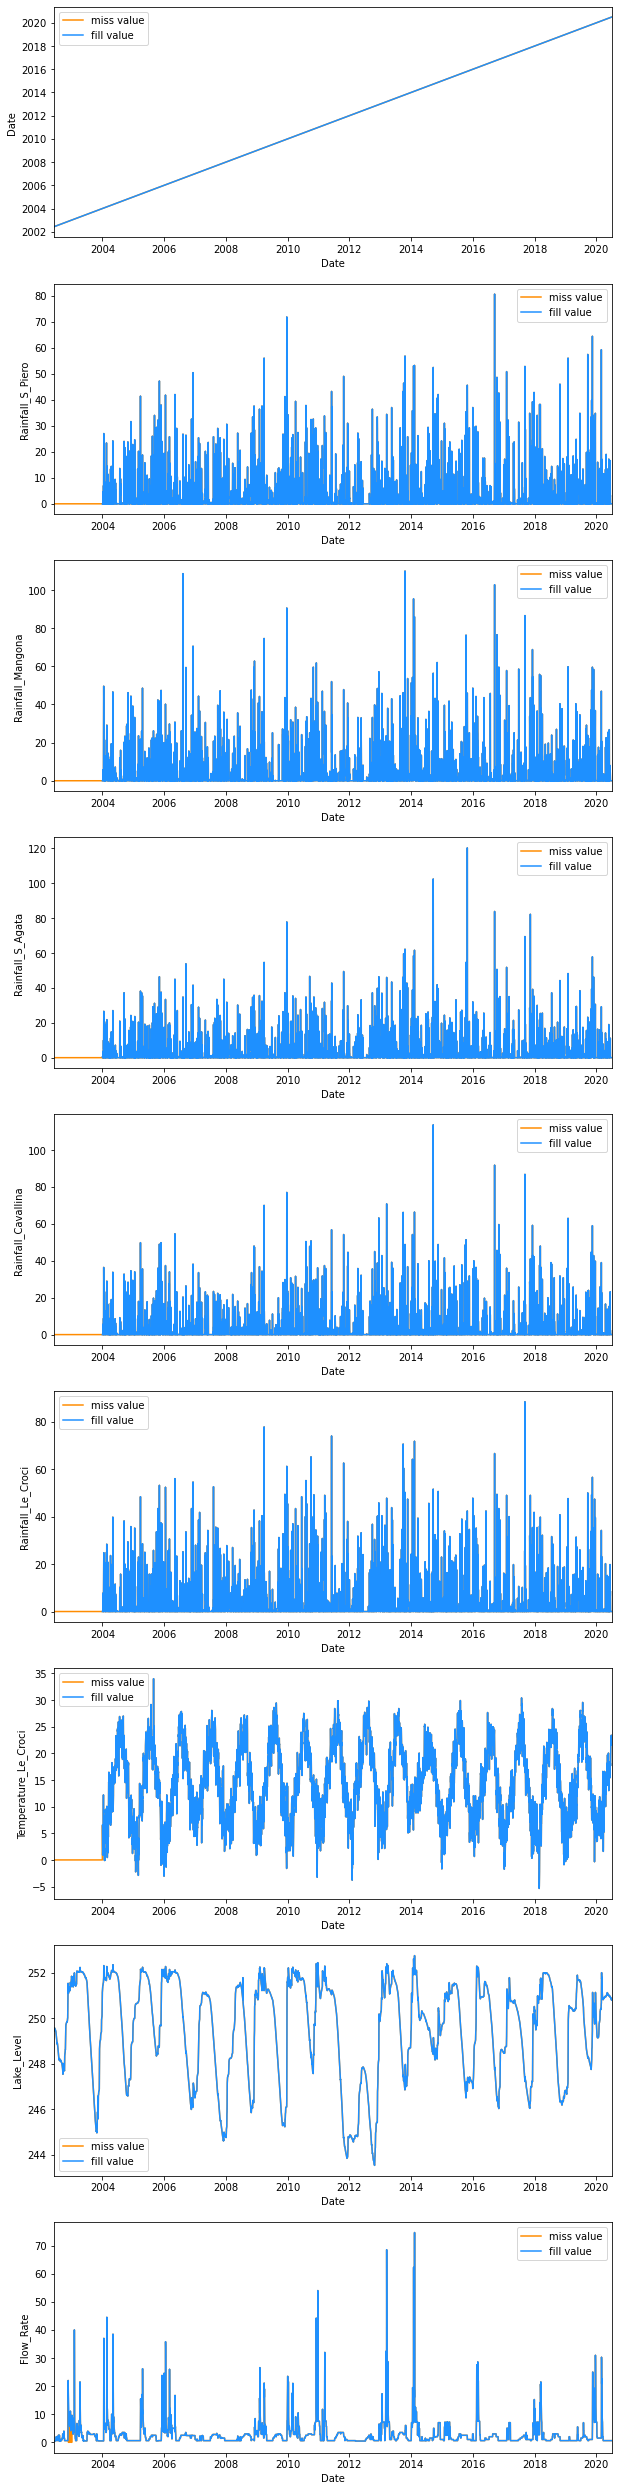

In [ ]:
plot_null_value(df, df.columns)

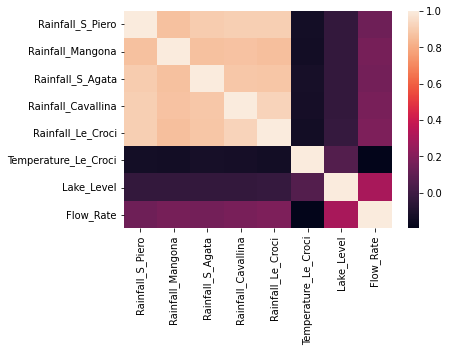

In [ ]:
# Corr

sns.heatmap(df.corr())

In [ ]:
df = pd.read_csv('./Aquifer_Petrignano.csv') # Good 8

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5223 entries, 0 to 5222
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  5223 non-null   object 
 1   Rainfall_Bastia_Umbra                 4199 non-null   float64
 2   Depth_to_Groundwater_P24              5168 non-null   float64
 3   Depth_to_Groundwater_P25              5184 non-null   float64
 4   Temperature_Bastia_Umbra              4199 non-null   float64
 5   Temperature_Petrignano                4199 non-null   float64
 6   Volume_C10_Petrignano                 5025 non-null   float64
 7   Hydrometry_Fiume_Chiascio_Petrignano  4199 non-null   float64
dtypes: float64(7), object(1)
memory usage: 326.6+ KB


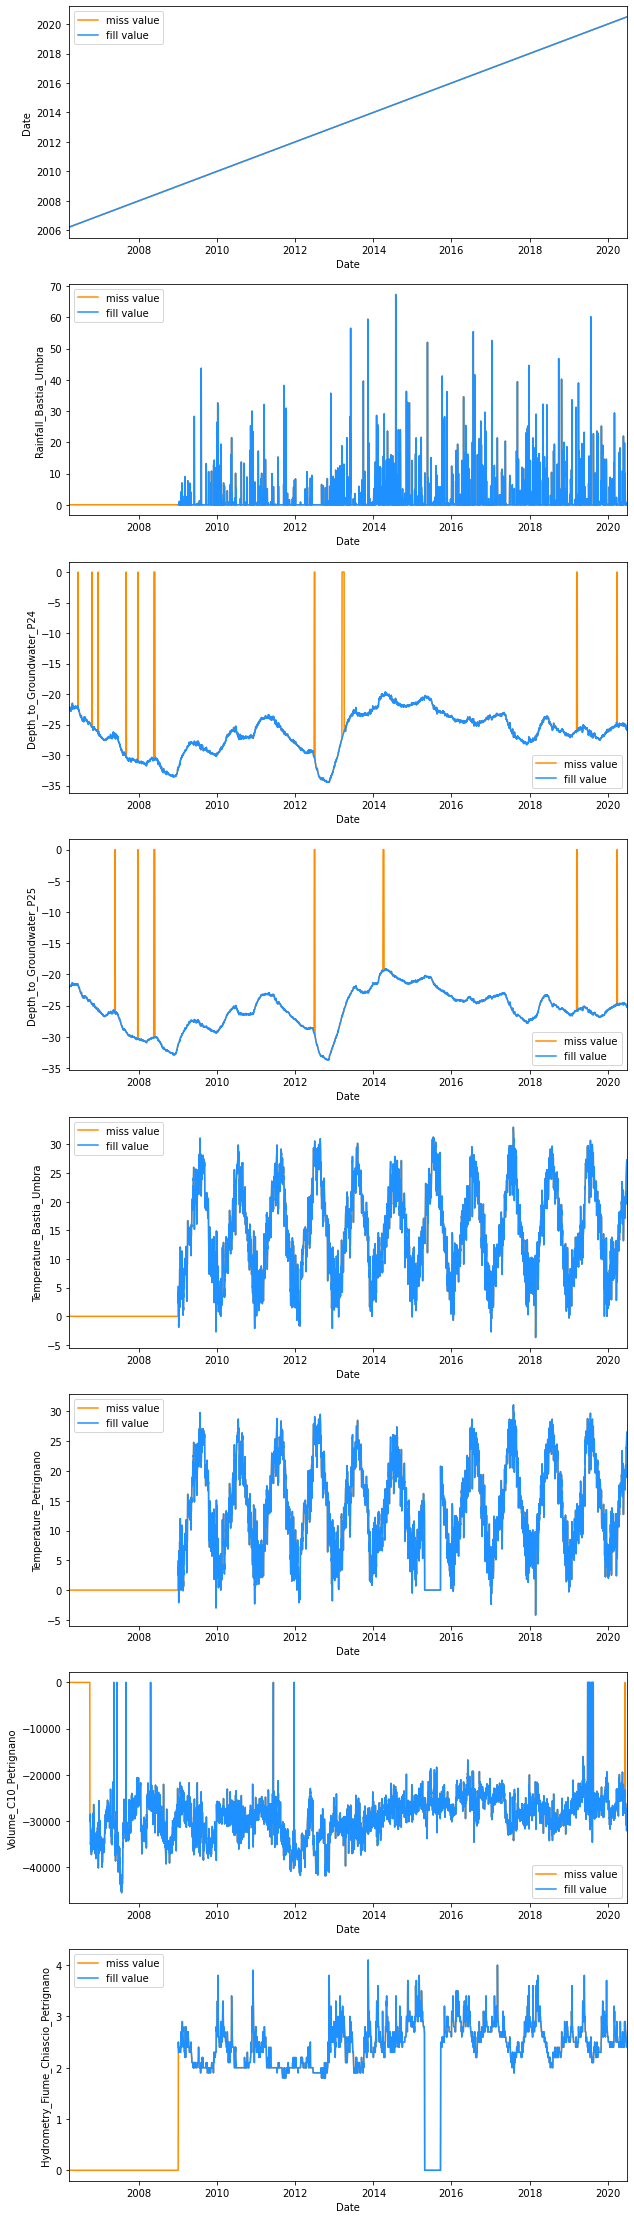

In [ ]:
to_date(df)
plot_null_value(df, df.columns)

In [ ]:
(df.Depth_to_Groundwater_P24 - df.Depth_to_Groundwater_P25).mean()

-0.5838607717665313

In [ ]:
df.Depth_to_Groundwater_P25

0       False
1       False
2       False
3       False
4       False
        ...  
5218    False
5219    False
5220    False
5221    False
5222    False
Length: 5223, dtype: bool

https://www.kaggle.com/nandha13/time-series-preprocess-feature-engineering-eda